# 추정량의 성질

In [ ]:
# 한글 폰트가 깨질 때 사용 - 런타임 메뉴에서 다시 시작 및 모두 실행 선택. (출처: https://teddylee777.github.io/colab/colab-korean)
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [2]:
# 그림 그리기를 위한 코드와 한글 실행
import matplotlib.pyplot as plt
from matplotlib import rc
%matplotlib inline

plt.rc('font', family='NanumBarunGothic') # clolab 에서 한글 사용 
plt.rcParams['axes.unicode_minus'] = False 
plt.rcParams["figure.figsize"] = (8,8)   # 그림 크기 조정

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

정치인은 지역구내 자신을 지지하는 유권자의 비율을 알고 싶어하고 기업에서 마케팅을 담당하는 사람들은 고객들이 제품에 대하여 어떤 점에 만족하며 불만이 있는지 알고 싶어한다. 이렇게 사람들이 자신의 업무 또는 관심에 따라 다양한 사실들을 알고 싶어하며 (예를 들면 소득의 평균, 몸무게의 평균, 성적의 평균, 실업률, 지지율, 제품의 불량률) 많는 경우 특정한 집단에 대하여 관심있는 사항의 평균 또는 비율을 알고 싶어한다. 

이러한 다양한 정보의 대한 요구에 대하여 여론조사를 실시하거나 실험 또는 관측연구를 수행하여 모집단에 대한 정보를 필요한 사람들에게 제공한다. 통계적인 확률표본을 사용하여 자료를 모으고 이를 이용하여 알고자 하는 모집단의 모수를 추정하는 것이 통계적 추정(statistical estimation)이다.

관심있는 모수는 대부분의 경우 모평균이나 모비율이며 이를 추정하는 방법은 의외로 간단한다. 확률표본으로 부터 얻어진 통계량, 즉 표본 평균 또는 표본 비율이 모수에 대한 추정량(estimator)이다.

- 통계량(statistics): 확률표본으로 부터 얻어진 요약값
- 추정량(estimator) : 관심있는 모수를 추정할 수 있는 통계량 

쉽게 요약하면 통계량은 표본평균, 표본비율 등 표본 자료를 요약하는 일반적인  방법을 기술한 것이고 추정량은 추정해야할 대상이 있는 통계량이다. 우리는 지지율, 실업률, 소득의 평균 등  관심이 있는 대상이 있을 때 이를 추정할 수 있는 통계량을 추정량이라고 부른다. 

추정량은 반드시 통계량일 필요는 없다. 예를  들어 해마다 경제전문가들이 다음 년도의 경제성장률을 예측하면서 추정값을 발표한다. 이러한 추정값은 확률표본을 사용하여 구한 통계량이 아니다.

우리는 이 절에서 **추정량이 확률표본으로 부터 얻은 통계량** 인 경우에 그 성질을 알아보도록 한다.

## 추정량의 임의성

모수의 추정량은 표본으로부터 얻어진 통계량이기 때문에 임의성(randomness)을 같는다. 여러분들이 선거 지지율을 조사하기 위항 18세 이상 성인을 1000명 임의로 추출한다고 하자. 동일한 여론 조사를 서로 다른 두 개의 회사가 동시에 실시하면 그 결과는 어떨까? 두 결과가 비슷할 수도 있고 매우 다를 수도 있다. 
그 이유는 **눈감고 표본을 추출하는** 임의성때문이다. 

이제 모집단을 가상적으로 만들어서 확률표본을 추출해 보자.

모집단은 앞 절에서와 유사하게 10만명으로 구성된 하나의 선거구이며 A 후보를 지지하는 사람이 6만명, 지지하지 않는 사람이 4만명 있다고 하자. 즉 모집단의 지지율이 60%이다.  

In [4]:
# 모집단의 수
N = 100000

# 지지하는 유권자의 수 
favor = 60000

# 반대하는 유권자의 수 
opposite = 40000

# 모집단 (1=지지, 0=반대)
P = np.concatenate((np.ones(favor), np.zeros(opposite)), axis=0)
P

array([1., 1., 1., ..., 0., 0., 0.])

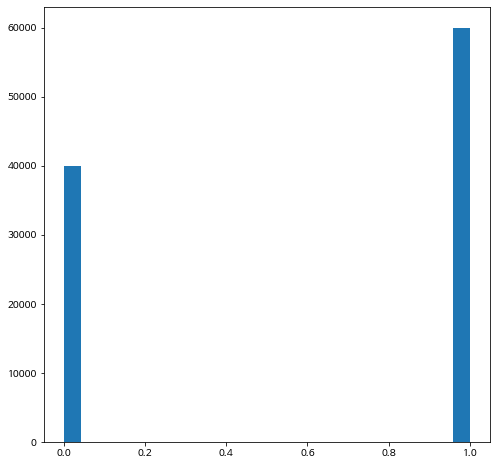

In [5]:
# 모집단의 분포
plt.hist(P, bins='auto')
plt.show()

In [6]:
# 모집단의 지지율 
theta = np.mean(P)
theta

0.6

이제 1000명의 표본 $x_1, x_2,\dots, x_{1000}$ 을 임의로 추출하고 표본 지지율 $\hat \theta$ 을 구해보자. 표본 지지율은 표본 평균이면 모집단의 지지율의 추정량이다.


$$ \hat \theta = \frac{x_1+x_2+\dots +x_{1000}}{1000} = \frac{\sum_{i=1}^{1000} x_i}{1000} $$

In [7]:
# 표본의 개수 
n= 1000

# 확률표본 
sample = np.random.choice(P, n, replace=False)
sample

array([0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0.,
       1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1.,
       0., 1., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1.,
       1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 1., 1., 0.,
       1., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 1.,
       1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1.,
       1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 0.,
       1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0.,
       1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1.,
       1., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0., 1.,
       1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0.,
       0., 0., 1., 1., 0.

In [8]:
#표본의 지지율 
hat_theta = np.mean(sample)
hat_theta

0.617

표본을 다시 추출하여 표본의 지지율을 구해보자.

In [9]:
sample = np.random.choice(P, n, replace=False)

hat_theta = np.mean(sample)
hat_theta

0.624

여러분이 위의 파이썬 코드를 여러 번 반복해서 실행해 보면 표본의 지지율이 다르게 나타나는 것을 알 수 있을 것이다. 당연히 추출할 때마다 다른 표본이 뽑히므로 추정량의 값도 변한다.

하지만 여러분은 추출할 때마다 표본의 지지율이 모집단의 지지율에 크게 벗어나지 않는 것을 알 수 있다.

## 추정량의 평균

자 이제 여러분들이 모집단에서 표본을 추출할 때 마다 추정량의 값이 다르게 주어진다는 것을 알았다.

여러분이 위의 파이썬 코드를 1000번 반복해서 실행하면 1000개의 서로 다른 추정량의 값을 얻을 수 있다. 그럼 1000개의 서로 다른 추정량의 값, 즉 1000개의 추정값(estimate)들의 평균은 무었일까?

추정량의 값을 추정값(estimate)라고 한다. 추정량은 임의성을 가지기 때문에 표본을 추출하기 전에는 그 값을 알 수 없다.  표본을 추출하면 관측한 데이터가 있으므로 추정량의 값을 구할 수 있다. 즉, 관측한 표본자료를 이용하여 계산한 추정량의 값이 추정값이다.

앞 절에서 수행했던 모의실험으로 1000개의 추정값을 구하여 그 평균을 구해보자. 

1000 개의 추정값 $\hat \theta_1, \hat \theta_2, \dots, \hat \theta_{1000}$ 이 있으므로 추정값들의 평균 $\bar \theta$ 은 다음과 같이 계산한다.

$$ \bar \theta = \frac{\sum_{i=1}^{1000} \hat \theta_i}{1000} $$




In [10]:
B = 1000 # 모의실험의 횟수

estimates = pd.DataFrame({'표본지지율':np.zeros(B)})

for i in np.arange(B):
  sample = np.random.choice(P, n, replace=False)
  estimates.loc[i,'표본지지율'] = np.mean(sample)

estimates 

,표본지지율
0,0.595
1,0.602
2,0.594
3,0.581
4,0.603
...,...
995,0.614
996,0.602
997,0.594
998,0.606


In [11]:
estimates.mean()

표본지지율    0.599315
dtype: float64

모의실험으로 얻은 1000개 추정값들의 평균이 모집단의 지지율 0.6과 매우 유사한 것을 알 수 있다. 


$$ \bar \theta = \frac{\sum_{i=1}^{1000} \hat \theta_i}{1000}  \approx \theta $$



이렇게 추정값들의 평균이 모수와 매우 가깝게 나오는 경우 편이(bias)가 매우 작다고 말한다.

$$ Bias = \theta - \bar \theta = \text{모수} - \text{추정값들의  평균} $$

일반적으로 추정량의 편이가 작을수록 좋은 추정량이다.



In [12]:
# 편이(bias)
np.mean(P) - estimates.mean()

표본지지율    0.000685
dtype: float64

## 추정량의 표준편차 

1000 개의 추정값들이 있으니 표준편차(standard deviation; SD)도 구할 수 있다. 

만약 1000 개의 추정값 $\hat \theta_1, \hat \theta_2, \dots, \hat \theta_{1000}$ 이 있다면 추정값들의 표준편차 SD 는 다음과 같다.

$$ SD = SD(\hat \theta) = \sqrt{ \frac{1}{1000-1} \sum_{i=1}^{1000} (\hat \theta_i - \bar \theta)^2} $$

표준편차를 구할 때  $n-1=1000-1=999$ 로 나눈다. 제곱합을 1000으로 나누는 경우도 있는데 두 경우 모두 표준편차라고 부르며 그 차이는 표본의 수 $n$이 크면 큰 차이가 없다.  

이제 1000 개의 추정값들이 있으니 표준편차는 다늠과 같이 `std()` 메소드로 구할 수 있다.

In [13]:
estimates.std()

표본지지율    0.015944
dtype: float64

이제 새로운 표본을 반복하여 추출하면서 지지율의 추정값들의 평균과 표준편차가 어떻게 변하는지 알아보자.

여러분은 추정값들의 평균과 표준편차가 변하지만 크게 변하지 않는 것을 알 수 있을 것이다.

In [14]:
B = 1000 # 모의실험의 횟수
n = 1000 # 표본의 수

estimates = pd.DataFrame({'표본지지율':np.zeros(B)})

for i in np.arange(B):
  sample = np.random.choice(P, n, replace=False)
  estimates.loc[i,'표본지지율'] = np.mean(sample)

[estimates.mean(),  estimates.std()]

[표본지지율    0.600562
 dtype: float64, 표본지지율    0.015327
 dtype: float64]

## 추정량의 분포 

더 나아가 1000개의 추정값들의 분포를 히스토그램으로 그려보자. 

아래 코드를 반복하면서 실행해보면 1000개의 추정값들의 분포는 어떻게 변하는가? 분포의 모양은 어떻게 나타나는가?

여러번 반복해보면 1000개의 추정값들의 분포는 모집단의 지지율 0.6을 중심으로 종모양의 분포를 보이는 것을 알 수 있다.

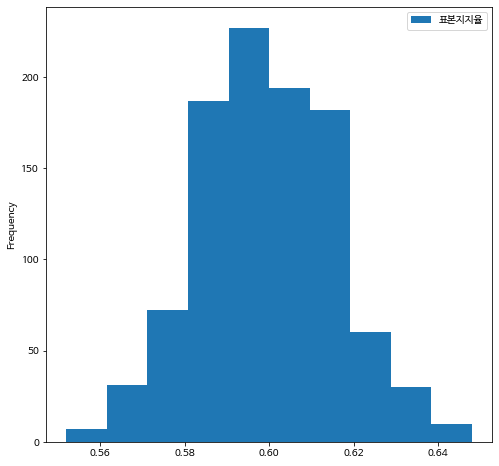

In [15]:
B = 1000 # 모의실험의 횟수
n = 1000 # 표본의 수

estimates = pd.DataFrame({'표본지지율':np.zeros(B)})

for i in np.arange(B):
  sample = np.random.choice(P, n, replace=False)
  estimates.loc[i,'표본지지율'] = np.mean(sample)

estimates.plot.hist()

## 정규분포 근사


앞 절에서 잠시 언급한것과 같이 위에서 본 1000개의 추정값들의 분포는 정규분포와 매우 유사하다. 통계학에서 가장 중요한 정리인 중심극한정리(Central Limit Theorem)은 표본의 수가 크면 추정량의 분포가 정규분포에 매우 가깝게 나타난다는 것을 알려준다. 


그럼 표본의 수가 얼마나 커야하나? **일반적으로 표본의 수가 50보다 크면 추정량의 분포가 정규분포에 꽤 가깝다고 말할 수 있다.**

위의 예제에서 고려한 표본의 개수가 1000개인 경우 추정량의 분포는 정규분포와 매우 유사하다.

우리는 확룰과 분포를 배울 때 정규분포의 다음과 같은 성질을 배웠다. 

- 추정량의 분포가 정규분포를 따른다면 평균으로부터 2*SD 안에서 추정량의 값이 나타날 확률은 95%이다.

자,  이제 위에서 구한 추정량의 표준편차에 2를 곱해보자.

$$ 2SD = 2\sqrt{ \frac{1}{1000-1} \sum_{i=1}^{1000} (\hat \theta_i - \bar \theta)^2} $$




In [16]:
B = 1000 # 모의실험의 횟수
n = 1000 # 표본의 수

estimates = pd.DataFrame({'표본지지율':np.zeros(B)})

for i in np.arange(B):
  sample = np.random.choice(P, n, replace=False)
  estimates.loc[i,'표본지지율'] = np.mean(sample)

2*estimates.std()

표본지지율    0.029321
dtype: float64

여러분이 위의 코드를 몇 번 반복해보면 추정값들의 표준편차에 2를 곱한 값(2*SD)이 0.03 과 매우 유사하게 나타나는 것을 알 수 있다.

이 0.03 과 95% 는 어디에서 많이 본 숫자이다. 

여러분이 네이버나 구글에 지지율 조사라고 검색한 후 뉴스를 보면 보통 1000명을 표본으로 하는 것을 알 수 있으면 다음과 같은 문구가 반드시 기사의 마지막에 나타나있는 것을 알 수 있다.  

-  표본오차는 95% 신뢰수준에서 ±3.1%포인트다.

위의 문구는 다음과 같은 의미를 가진다.

1. 표본 지지율(추정량)의 분포가 정규분포에 가깝다.

$$ \hat \theta  \sim N(\theta, SD^2) $$

2. 따라서 표본 지지율과 모집단의 지지율의 차이가 2*SD 이내 일 확률, 즉 신뢰수준은 근사적으로 95%이다.



$$ P( \theta - 2SD \le \hat \theta \le \theta+ 2SD) \approx 0.95 $$

신문 기사에서 **표본오차(sampling error)** 라고 부르는 값은 표본 지지율, 즉 추정량의 표준편차 SD 에 2를 곱한 값이다.

왜 우리는 이렇게 표본오차와 신뢰수준 등을 이용하여 추정량의 정확성을 나타내는가? 그 이유를 요약하면 다음과 같이 설명할 수 있다.

- 확률표본을 추출하여 표본 지지율을 계산했을 때 얻은 값이 실제 모집단의 지지율과 얼마나 차이가 나는지는 알 수 없다.
- 표본이 모집단의 일부분이며 확률표본이 가진 임의성 때문에 나타날 수 있는 오차(error), 즉 표본오차를 추정량의 분포를 이용하여 제시한다.  
- 표본 지지율, 즉 추정량의 분포가 정규분포에 가깝다는 사실을 이용하여 추정량이 95%의 확률로 집중되어 나타나는 구간을 제시할 수 있다. 
- 이 구간이 바로 모집단의 지지율을 중심에서 좌우 2*SD 값만큼 벌이진 구간이다.  
- 이때 사용하는 확률 95%를 신뢰수준이라고 부르며 2*SD 값을 표본오차라고 부른다.




### 실제 조사의 경우

실제로 우리는 모집단의 지지율을 모른다. 따라서 위와 같은 모의실험으로 추정량의 표준편차 SD를 구하는 것도 불가능하다.  신문기사에 나오는 실제 조사에서는 모집단의 지지율이 50% 일 경우를 가정하고 SD를 구한다. 이 경우 2*SD 는 다음과 같이 이론적으로 계산할 수 있다. 


$$ 2SD = 2 \sqrt{ \frac{(0.5)(1-0.5)}{n}} = \frac{1}{\sqrt{n}} $$

표본의 크기가 $n=1000$ 이면 2*SD가 이론적으로 0.031, 즉 3.1%포인트로 주어진다.


In [17]:
1/np.sqrt(1000)

0.03162277660168379

## 모의실험

이제 모집단의 크기, 모수(지지율) 등은 바꾸어 가면서 표본 지지율의 평균, 표준편차(SD), 표본오차(2SD) 를 구해보자. 또한 표본의 지지율이 나타나는 확률이 95%인 구간을 히스토그램으로 나타내 보자.

특히 다음과 같은 경우에 대하여 모의실험을 해보자.
- 모집단의 지지율이 50%인 경우
- 모집단의 지지율이 아주 작은 1% 인 경우
- 표본의 크기가 아주 작은 경우, 예를 들어 $n=10$ 인 경우

**주의**: 모집단의 수를 너무 크게 하면 실행 시간이 너무 오래 걸리니 주의하자.

In [26]:
# 모집단의 수
N = 100000

# 모집단의 지지율
theta = 0.5

# 지지하는 유권자의 수 
favor = int(N*theta)

# 반대하는 유권자의 수 
opposite = N-favor

# 모집단 (1=지지, 0=반대)
P = np.concatenate((np.ones(favor), np.zeros(opposite)), axis=0)

# 모의실험의 횟수
B = 1000 

# 표본의 수
n = 1000 

# 모의실험 - 표본의 추출을 B번 반복하여 B개의 지지율(추정량)을 구한다.
estimates = pd.DataFrame({'표본지지율':np.zeros(B)})

for i in np.arange(B):
  sample = np.random.choice(P, n, replace=False)
  estimates.loc[i,'표본지지율'] = np.mean(sample)

# B개의 지지율의 평균  
AVG=  float(estimates.mean())

# B개의 지지율의 표준편차
SD = float(estimates.std())

# 표본 지지율의 평균, 표준편차(SD), 표본오차(2SD)
sim_summary = pd.DataFrame({ '지지율평균': [AVG], 'SD' : [SD], '표본오차' : [2*SD] })

sim_summary


,지지율평균,SD,표본오차
0,0.499554,0.015217,0.030435


In [27]:
# 모집단의 지지율
theta

0.5

In [28]:
# 95% 신뢰 수준의 구간
[AVG - 2* SD, AVG + 2*SD ]

[0.4691193716532864, 0.5299886283467143]

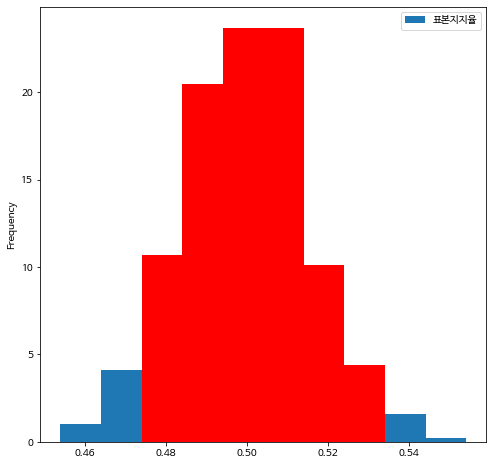

In [29]:
# 히스토그램
p= estimates.plot.hist( density=True)

# 모집단의 지지율에서 2SD 만큼 벌어진 구간(95%)은 빨간색으로 
for rectangle in p.patches:
    if rectangle.get_x() >=  (AVG - 2*SD) and rectangle.get_x() <=  (AVG + 2*SD) :
        rectangle.set_facecolor('red')

## 요약

데이터과학에서 확률표본을 이용한 추정에 대한 요약입니다. 

- 모집단과 표본 
  - 모집단은 관심이 있는 전체 집단이다.
  - 모수는 모집단의 특성값이다.
  - 확률표본은 모집단의 구성원이 표본에 속할 확률을 미리 알고 있으며 그 확률에 따라서 추출한 표본이다.
  - 표본 자료의 분포는 모집단의 분포와 유사하게 나타난다.

- 추정량의 분포 
  - 추출된 표본으로 부터 얻은 추정량의 값이 모수와 얼마나 차이가 나는지는 알 수가 없다.    
  - 하지만 표본의 크기가 커질수록 추정량의 값은 모수에 가깝게 나타날 가능성이 높아진다.
  - 또한 표본의 크기가 크면 추정량의 분포는 정규분포와 매우 유사하다.
  - 따라서 추정량의 분포에 대한 성질을 정규분포의 성질을 이용하여 말할 수 있다.
  - 추정량의 표준편차를 SD 라고 하면 추정량의 값과 모수의 차이가 2*SD 이내일 확률은 약 95% 이라고 말할 수 있다. 

마지막으로 강조하고 싶은 점은 편의표본이나 비확률표본을 사용한 경우, 추정한 값의 정확성에 대하여 말할 때 위와 같은 논리를 사용할 수 없다.   
